In [49]:
import numpy as np;
import matplotlib.pyplot as plt;

[[-0.04760276 -0.10770063]
 [-0.04760276 -0.10770063]]


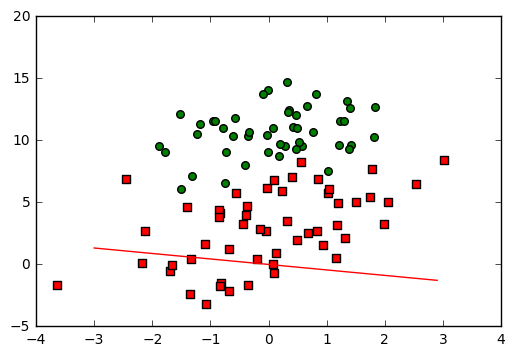

In [72]:
#加载数据函数
def loadDataSet(path):
    dataMat=[];
    lableMat=[];
    #打开数据文件
    fr=open(path);
    for line in fr.readlines():
        #获取数据每一行，并分割
        lineArr=line.strip().split();
        #添加到数据表中
        dataMat.append([float(lineArr[0]),float(lineArr[1])]);
        #添加到标签中
        lableMat.append(int(lineArr[2]));
    return dataMat,lableMat;
#sigmoid函数
def sigmoid(inx):
    return 1.0/(1+np.exp(-inx));
#随机梯度上升，在每次迭代中随机选择样本来更新权重，并且随迭代次数增加，权重变化越小。
def GradAscent(dataMat,LableMat):
    data=dataMat;
    classLable=LableMat;
    #获取数据大小
    m,n=np.shape(data);
    #迭代次数
    iterations=500;
    #下降速度
    alpha=0.01;
    #初始化权重，和特征数量一样大
    weight=np.ones((n,1));
    for times in range(iterations):
#         #求测试数据和权重相乘的和
#         mul=data*weight;
#         #mul=np.dot(data,weight);
#         sum1=np.sum(mul);
#         #归一化
#         h=sigmoid(sum1);
#         #求残差
#         error=(classLable-h);
#         #erro=error.astype(np.int);
#         #更新权重
#         weight = weight + alpha * data.transpose()* error #迭代更新权重
        ##遍历计算每一行
        for i in range(m): 
            h = sigmoid(sum(data[i] * weight))
            error = classLable[i] - h
            weight = weight + alpha * error * data[i]
    return weight;
#画出最终分类的图
def plotBestFit(dataMat,labelMat,weights):  
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,0])
            ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0])
            ycord2.append(dataArr[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    x = np.arange(-3.0,3.0, 0.1)
    y = (-weights[0,0]*x)/weights[0,1]
    ax.plot(x, y,"r-",4)
#     plt.xlabel('X1')
#     plt.ylabel('X2')
    
    plt.show()

if __name__=="__main__":
    path="data.txt";
    dataMat, labelMat = loadDataSet(path)
    weights=GradAscent(dataMat, labelMat);
    print(weights)
    plotBestFit(dataMat,labelMat,weights)
    